# Import required libararies

In [198]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plpt
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
%matplotlib inline

# Load data from csv file 

In [199]:
sample_data = pd.read_csv("data.csv",index_col=0)
sample_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# Remove the heading from cloumns 

In [200]:
sample_data.shape
x=sample_data.iloc[:,:].values
y=pd.DataFrame(x)
y.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1.0
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1.0
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1.0
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1.0
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.0


# Splitting the data into training & test set

In [201]:
from sklearn.model_selection import train_test_split
X=sample_data.iloc[:,0:21].values
Y=sample_data.iloc[:,22].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, 
                     test_size=0.20,
                     stratify=Y,
                     random_state=1)


# Knn classifier 

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

param_grid = [{  'weights':['distance'],
                'n_neighbors':(4,5,6,7,8,9,10),
                'p':[i for i in range(1,6)]},
              {'weights':['uniform'], 
                 'n_neighbors':(4,5,6,7,8,9,10)  }]

Knn_cla = KNeighborsClassifier()



In [203]:
Knn_cla

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# Using GridSearchCV to calculate optimal k values 

In [204]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(Knn_cla,param_grid)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': (4, 5, 6, 7, 8, 9, 10), 'p': [1, 2, 3, 4, 5]}, {'weights': ['uniform'], 'n_neighbors': (4, 5, 6, 7, 8, 9, 10)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [205]:
grid_search.best_estimator_
grid_search.best_score_
grid_search.best_params_

{'n_neighbors': 5, 'p': 4, 'weights': 'distance'}

# holdout + cross-validation  (we use 10 folds) 

In [206]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

Knn_cla=KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                            metric_params=None, n_jobs=1, n_neighbors=5,p=4, weights='distance')
kfold = StratifiedKFold(n_splits=10,
                     random_state=1).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
    Knn_cla.fit(X_train[train],y_train[train])
    score = Knn_cla.score(X_train[test],y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
    
    
print('\nCV accuracy:%.3f +/- %.3f' %(np.mean(scores),np.std(scores)))    
    

Fold:  1, Class dist.: [ 34 106], Acc: 0.812
Fold:  2, Class dist.: [ 34 106], Acc: 0.875
Fold:  3, Class dist.: [ 34 106], Acc: 0.688
Fold:  4, Class dist.: [ 34 106], Acc: 0.875
Fold:  5, Class dist.: [ 34 106], Acc: 0.750
Fold:  6, Class dist.: [ 34 106], Acc: 0.875
Fold:  7, Class dist.: [ 34 106], Acc: 0.750
Fold:  8, Class dist.: [ 34 106], Acc: 0.812
Fold:  9, Class dist.: [ 35 107], Acc: 0.786
Fold: 10, Class dist.: [ 35 107], Acc: 0.929

CV accuracy:0.815 +/- 0.070


# learning curves for the training and test sets 

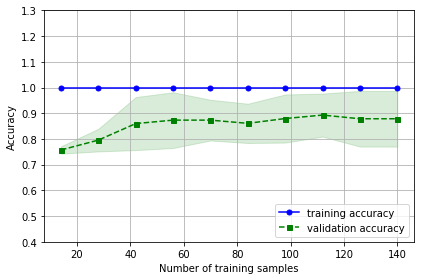

In [207]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
knn = make_pipeline(StandardScaler(),Knn_cla)
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.3])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

# Validation curves for the training and test sets

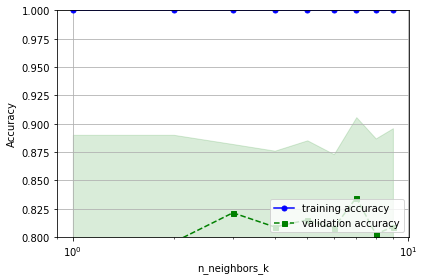

In [209]:
from sklearn.model_selection import validation_curve


param_range = [i for i in range (1,10) ]
train_scores, test_scores = validation_curve(
                estimator=Knn_cla, 
                X=X_train, 
                y=y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('n_neighbors_k')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()